# ML trials

In [1]:
import pandas as pd

performance_data = pd.read_csv('performance_data.csv')
submission_template = pd.read_csv('submission_template.csv')
weather_data = pd.read_csv('weather_data.csv')

In [2]:
performance_data.columns

Index(['HYBRID_ID', 'ENV_ID', 'HYBRID_MG', 'ENV_MG', 'YIELD', 'YEAR', 'LAT',
       'LONG', 'PLANT_DATE', 'HARVEST_DATE', 'IRRIGATION', 'ENV_YIELD_MEAN',
       'ENV_YIELD_STD', 'ELEVATION', 'CLAY', 'SILT', 'SAND', 'AWC', 'PH', 'OM',
       'CEC', 'KSAT'],
      dtype='object')

In [3]:
weather_data.head()

,ENV_ID,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
0,Env_1,1,29030.400391,0,92.800003,24,-14.5,-21.0,120
1,Env_1,2,29030.400391,0,166.399994,24,-7.0,-26.0,80
2,Env_1,3,29030.400391,0,144.000000,24,0.0,-12.5,240
3,Env_1,4,29030.400391,0,112.000000,24,-3.5,-11.5,240
4,Env_1,5,29030.400391,1,153.600006,24,2.5,-11.5,240


## Transforming weather data into useful metrics

In [4]:
weather_data_grouped_mean = weather_data.groupby(by='ENV_ID').mean()
weather_data_grouped_std = weather_data.groupby(by='ENV_ID').std()
weather_data_grouped_mean.head()
weather_data_grouped_std.head()
weather_data_grouped = weather_data_grouped_mean.join(weather_data_grouped_std,
                                                      lsuffix='_AVG',
                                                     rsuffix='_STD')
weather_data_grouped = weather_data_grouped.drop('DAY_NUM_AVG',axis=1)
weather_data_grouped.head()

,DAYL_AVG,PREC_AVG,SRAD_AVG,SWE_AVG,TMAX_AVG,TMIN_AVG,VP_AVG,DAY_NUM_STD,DAYL_STD,PREC_STD,SRAD_STD,SWE_STD,TMAX_STD,TMIN_STD,VP_STD
ENV_ID,,,,,,,,,,,,,,,
Env_1,43200.000043,1.684932,276.111781,11.167123,8.093151,-3.256164,630.356164,105.510663,10075.200862,4.544882,131.085275,16.046875,14.926959,13.574307,535.634711
Env_10,43200.946768,3.079452,294.978630,19.868493,12.095890,2.241096,874.191781,105.510663,8183.382184,5.974924,134.977729,31.810984,11.625704,9.839269,559.526111
Env_100,43200.000070,2.901370,296.714521,20.679452,12.616438,0.632877,820.054795,105.510663,8795.413435,7.152662,119.593751,30.413609,12.877466,12.410814,614.102577
Env_1000,43200.946854,2.000000,352.368219,0.997260,18.323288,2.883562,824.876712,105.510663,6955.702533,6.970897,111.010912,2.447805,11.374718,10.219944,674.104452
Env_1001,43200.946854,2.561644,341.681097,2.443836,17.701370,2.924658,862.246575,105.510663,6955.702533,8.697269,112.386846,5.729262,11.039508,10.119774,629.404388


## Joining performance and weather data

In [5]:
joined_df = performance_data.join(weather_data_grouped,on='ENV_ID')
joined_df.head()
joined_df.columns

heat_stress_df = joined_df[['HYBRID_ID','ENV_ID','TMAX_AVG','TMAX_STD',
                            'TMIN_AVG','TMIN_STD','DAYL_AVG','DAYL_STD',
                           'SRAD_AVG','SRAD_STD','YIELD']]
drought_stress_df = joined_df[['HYBRID_ID','ENV_ID','IRRIGATION','PREC_AVG','PREC_STD','KSAT',
                              'SWE_AVG','SWE_STD','VP_AVG','VP_STD','AWC','YIELD']]

# HEAT STRESS

In [6]:
#Setting non-numeric variables to index
heat_stress_df = heat_stress_df.set_index(['HYBRID_ID','ENV_ID'])
heat_stress_df.head()

TMAX_AVG   TMAX_STD  TMIN_AVG   TMIN_STD      DAYL_AVG  \
HYBRID_ID ENV_ID                                                           
H2782     Env_1   8.093151  14.926959 -3.256164  13.574307  43200.000043   
          Env_2   8.178082  14.860702 -3.290411  13.446089  43200.000054   
H2240     Env_3   9.805479  14.311170 -1.224658  12.901740  43200.000054   
H1527     Env_3   9.805479  14.311170 -1.224658  12.901740  43200.000054   
H1369     Env_3   9.805479  14.311170 -1.224658  12.901740  43200.000054   

                      DAYL_STD    SRAD_AVG    SRAD_STD     YIELD  
HYBRID_ID ENV_ID                                                  
H2782     Env_1   10075.200862  276.111781  131.085275  107.9577  
          Env_2   10001.326165  278.706849  130.288514   85.7498  
H2240     Env_3   10001.326165  274.112876  122.067104   74.6116  
H1527     Env_3   10001.326165  274.112876  122.067104   83.8191  
H1369     Env_3   10001.326165  274.112876  122.067104   81.7917

In [7]:
heat_stress_df.corr()

,TMAX_AVG,TMAX_STD,TMIN_AVG,TMIN_STD,DAYL_AVG,DAYL_STD,SRAD_AVG,SRAD_STD,YIELD
TMAX_AVG,1.000000,-0.766013,0.844419,-0.660018,-0.031076,-0.865140,0.689132,-0.752999,0.081646
TMAX_STD,-0.766013,1.000000,-0.793189,0.893305,0.107864,0.742199,-0.441500,0.417376,-0.064415
TMIN_AVG,0.844419,-0.793189,1.000000,-0.717589,-0.038231,-0.798304,0.306109,-0.616567,0.016498
TMIN_STD,-0.660018,0.893305,-0.717589,1.000000,0.123271,0.560108,-0.285517,0.250184,0.014625
DAYL_AVG,-0.031076,0.107864,-0.038231,0.123271,1.000000,0.028784,-0.010226,-0.046711,0.003500
DAYL_STD,-0.865140,0.742199,-0.798304,0.560108,0.028784,1.000000,-0.747047,0.675689,-0.116823
SRAD_AVG,0.689132,-0.441500,0.306109,-0.285517,-0.010226,-0.747047,1.000000,-0.535784,0.161162
SRAD_STD,-0.752999,0.417376,-0.616567,0.250184,-0.046711,0.675689,-0.535784,1.000000,-0.160375
YIELD,0.081646,-0.064415,0.016498,0.014625,0.003500,-0.116823,0.161162,-0.160375,1.000000


In [8]:
print('Total performance observations: ' + str(len(heat_stress_df)))
print('Total unique hybrids: ' + str(len(heat_stress_df.reset_index()['HYBRID_ID'].unique())))

Total performance observations: 387427
Total unique hybrids: 2452


## Setting up a Random Forest model

In [9]:
# Splitting data
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(heat_stress_df, test_size = 0.3, random_state=1)
x_train = train.iloc[:,0:-1]
y_train = train['YIELD']
x_test = test.iloc[:,0:-1]
y_test = test['YIELD']
x_train.head()
y_train.head()

HYBRID_ID  ENV_ID  
H1155      Env_943     125.8307
H1237      Env_1274     53.5729
H1401      Env_1260    110.6046
H1146      Env_1307    124.7939
H1000      Env_396     113.9650
Name: YIELD, dtype: float64

In [10]:
# Setting up model
import numpy as np
from sklearn import linear_model
from sklearn import tree

lin_model_hs = linear_model.LinearRegression()
tree_model_hs = tree.DecisionTreeRegressor()

# Fitting models
lin_model_hs.fit(x_train,y_train)
tree_model_hs.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Model scores

In [11]:
# Make predictions
lin_testing_predictions  = lin_model_hs.predict(x_test)
tree_testing_predictions = tree_model_hs.predict(x_test)

#Get scores on the testing data
print(lin_model_hs.score(x_test,y_test))
print(tree_model_hs.score(x_test,y_test))

0.06374242628179727
0.6173379501845961


## Finding the best Decision Tree Regressor

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {
     'max_depth':(10,15,20),
     'min_samples_split': (2,4),
     'min_samples_leaf': (2,3,4)
}

model = GridSearchCV(tree.DecisionTreeRegressor(),
                     parameters,cv=3,
                     return_train_score=True,
                     iid=False)
model.fit(heat_stress_df.iloc[:,0:-1], np.ravel(heat_stress_df['YIELD']))

results = pd.DataFrame(model.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.594988,0.139136,0.013460,0.001279,10,2,2,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",-0.785675,-0.331285,-0.167036,-0.427999,0.261653,5,0.469800,0.519985,0.478358,0.489381,0.021920
1,0.905960,0.047897,0.026497,0.006009,10,2,4,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",-0.959308,-0.296437,-0.171033,-0.475593,0.345849,6,0.469800,0.519985,0.478358,0.489381,0.021920
2,0.523274,0.103645,0.012480,0.002179,10,3,2,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",-0.726077,-0.271958,-0.169174,-0.389070,0.241966,3,0.469800,0.519985,0.478358,0.489381,0.021920
3,0.658227,0.131701,0.023657,0.004856,10,3,4,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",-0.813490,-0.274139,-0.172432,-0.420021,0.281306,4,0.469800,0.519985,0.478358,0.489381,0.021920
4,0.583395,0.050636,0.013517,0.002422,10,4,2,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",-0.547180,-0.308101,-0.165800,-0.340360,0.157360,1,0.469800,0.519985,0.478358,0.489381,0.021920
5,0.729855,0.087936,0.024193,0.011763,10,4,4,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",-0.650929,-0.271218,-0.152035,-0.358061,0.212728,2,0.469800,0.519985,0.478358,0.489381,0.021920
6,0.635954,0.150587,0.017075,0.007225,15,2,2,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",-0.826945,-0.375078,-0.292676,-0.498233,0.234856,8,0.607917,0.618371,0.578206,0.601498,0.017014
7,0.594720,0.054847,0.015429,0.003433,15,2,4,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",-0.872873,-0.429946,-0.431187,-0.578002,0.208506,14,0.607917,0.618371,0.578206,0.601498,0.017014
8,0.504338,0.045547,0.011970,0.000534,15,3,2,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",-0.987293,-0.432594,-0.351479,-0.590455,0.282554,15,0.607917,0.618371,0.578206,0.601498,0.017014
9,0.488651,0.010394,0.011235,0.000861,15,3,4,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",-1.090806,-0.348036,-0.404704,-0.614515,0.337582,16,0.607917,0.618371,0.578206,0.601498,0.017014


# DROUGHT STRESS

In [13]:
#Setting non-numeric variables to index
drought_stress_df = drought_stress_df.set_index(['HYBRID_ID','ENV_ID'])
drought_stress_df.head()

IRRIGATION  PREC_AVG  PREC_STD  KSAT    SWE_AVG    SWE_STD  \
HYBRID_ID ENV_ID                                                              
H2782     Env_1         DRY  1.684932  4.544882   9.4  11.167123  16.046875   
          Env_2         DRY  1.621918  4.372688  10.2   9.545205  13.847730   
H2240     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   
H1527     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   
H1369     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   

                      VP_AVG      VP_STD    AWC     YIELD  
HYBRID_ID ENV_ID                                           
H2782     Env_1   630.356164  535.634711  18.65  107.9577  
          Env_2   612.602740  528.588280  18.75   85.7498  
H2240     Env_3   717.917808  585.217198  18.95   74.6116  
H1527     Env_3   717.917808  585.217198  18.95   83.8191  
H1369     Env_3   717.917808  585.217198  18.95   81.7917

In [14]:
drought_stress_df.head()

IRRIGATION  PREC_AVG  PREC_STD  KSAT    SWE_AVG    SWE_STD  \
HYBRID_ID ENV_ID                                                              
H2782     Env_1         DRY  1.684932  4.544882   9.4  11.167123  16.046875   
          Env_2         DRY  1.621918  4.372688  10.2   9.545205  13.847730   
H2240     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   
H1527     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   
H1369     Env_3        NONE  1.183562  4.047351   9.9   4.394521   7.829079   

                      VP_AVG      VP_STD    AWC     YIELD  
HYBRID_ID ENV_ID                                           
H2782     Env_1   630.356164  535.634711  18.65  107.9577  
          Env_2   612.602740  528.588280  18.75   85.7498  
H2240     Env_3   717.917808  585.217198  18.95   74.6116  
H1527     Env_3   717.917808  585.217198  18.95   83.8191  
H1369     Env_3   717.917808  585.217198  18.95   81.7917

In [15]:
# Converting irrigation to numeric values
def irrigation_converter(string):
    import numpy as np
    if string == np.nan:
        return np.nan
    if string == 'NONE' or string == 'DRY':
        return 0
    if string == 'ECO':
        return 1
    if string == 'LIRR':
        return 2
    if string == 'IRR':
        return 3
    else:
        next

drought_stress_df['IRRIGATION'] = drought_stress_df['IRRIGATION'].apply(irrigation_converter)
print('Total performance observations: ' + str(len(drought_stress_df)))
print('Total unique hybrids: ' + str(len(drought_stress_df.reset_index()['HYBRID_ID'].unique())))

Total performance observations: 387427
Total unique hybrids: 2452


In [16]:
# Drop nan
drought_stress_df.dropna(inplace=True)

print('Total performance observations: ' + str(len(drought_stress_df)))
print('Total unique hybrids: ' + str(len(drought_stress_df.reset_index()['HYBRID_ID'].unique())))

Total performance observations: 379143
Total unique hybrids: 2452


## Setting up a Random Forest model

In [17]:
# Splitting data
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(drought_stress_df, test_size = 0.3, random_state=1)
x_train = train.iloc[:,0:-1]
y_train = train['YIELD']
x_test = test.iloc[:,0:-1]
y_test = test['YIELD']
x_train.head()
y_train.head()

HYBRID_ID  ENV_ID  
H3184      Env_1142    134.8882
H1320      Env_851     119.6281
H1308      Env_621     150.5645
H1190      Env_597     119.9465
H1228      Env_769     128.3502
Name: YIELD, dtype: float64

In [18]:
# Setting up model
import numpy as np
from sklearn import linear_model
from sklearn import tree

lin_model_ds = linear_model.LinearRegression()
tree_model_ds = tree.DecisionTreeRegressor()

# Fitting models
lin_model_ds.fit(x_train,y_train)
tree_model_ds.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Model scores

In [19]:
# Make predictions
lin_testing_predictions  = lin_model_ds.predict(x_test)
tree_testing_predictions = tree_model_ds.predict(x_test)

#Get scores on the testing data
print(lin_model_ds.score(x_test,y_test))
print(tree_model_ds.score(x_test,y_test))

0.09644752175279092
0.6198724918821297


## Finding the best Decision Tree Regressor

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
     'max_depth':(10,15,20),
     'min_samples_split': (2,4),
     'min_samples_leaf': (2,3,4)
}

model = GridSearchCV(tree.DecisionTreeRegressor(),
                     parameters,cv=3,iid=False,
                     return_train_score=True)
model.fit(drought_stress_df.iloc[:,0:-1], np.ravel(drought_stress_df['YIELD']))

results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.484467,0.051419,0.012644,0.001268,10,2,2,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",-0.814794,-0.004608,-0.505847,-0.441750,0.333848,6,0.530296,0.494970,0.464490,0.496585,0.026889
1,0.472251,0.038231,0.014792,0.002612,10,2,4,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",-0.740905,-0.020009,-0.282254,-0.347723,0.297923,2,0.530296,0.494970,0.464490,0.496585,0.026889
2,0.455360,0.038656,0.011907,0.000679,10,3,2,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",-0.663883,-0.010926,-0.296751,-0.323853,0.267256,1,0.530296,0.494970,0.464490,0.496585,0.026889
3,0.434295,0.014474,0.011244,0.000099,10,3,4,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",-0.754010,-0.015060,-0.444509,-0.404526,0.302997,5,0.530296,0.494970,0.464490,0.496585,0.026889
4,0.419069,0.009834,0.011015,0.000307,10,4,2,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",-0.800299,-0.019273,-0.378436,-0.399336,0.319195,4,0.530296,0.494970,0.464490,0.496585,0.026889
5,0.423904,0.009395,0.011190,0.000386,10,4,4,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",-0.727469,-0.009718,-0.321799,-0.352995,0.293850,3,0.530296,0.494970,0.464490,0.496585,0.026889
6,0.506637,0.021547,0.012538,0.000583,15,2,2,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",-0.927103,-0.213866,-0.374615,-0.505194,0.305467,11,0.618060,0.613620,0.554244,0.595308,0.029093
7,0.553430,0.047766,0.013739,0.001772,15,2,4,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",-0.858648,-0.196803,-0.448851,-0.501434,0.272744,10,0.618060,0.613620,0.554244,0.595308,0.029093
8,0.590938,0.036925,0.014150,0.000676,15,3,2,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",-0.888555,-0.184905,-0.464111,-0.512524,0.289297,12,0.618060,0.613620,0.554244,0.595308,0.029093
9,0.517484,0.009489,0.012676,0.000983,15,3,4,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",-0.835866,-0.171465,-0.467942,-0.491757,0.271763,9,0.618060,0.613620,0.554244,0.595308,0.029093


1. Resolve the deprecating issue
2. Visualization to show for the best parameter selection
3. Change the validation to whole data, not just the test

## Find feature importance

## Decision Tree illustration

### Heat stress
TMAX_AVG is the most decisive factor when it comes to predicting yield

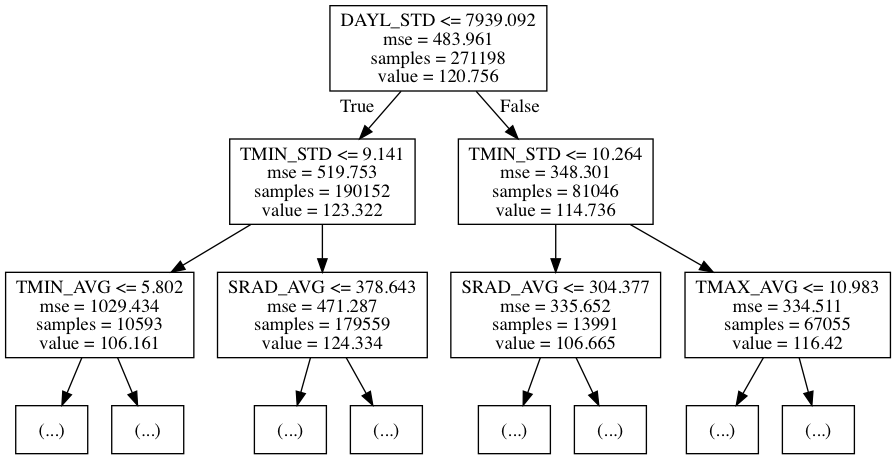

In [21]:
import pydotplus 
from IPython.display import Image

feature_names = [key for key in heat_stress_df.columns if not key == 'YIELD']

dot_data = tree.export_graphviz(tree_model_hs,
                                max_depth=2,
                                out_file=None,
                                feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

### Drought stress
IRRIGATION is the most decisive factor when it comes to predicting yield

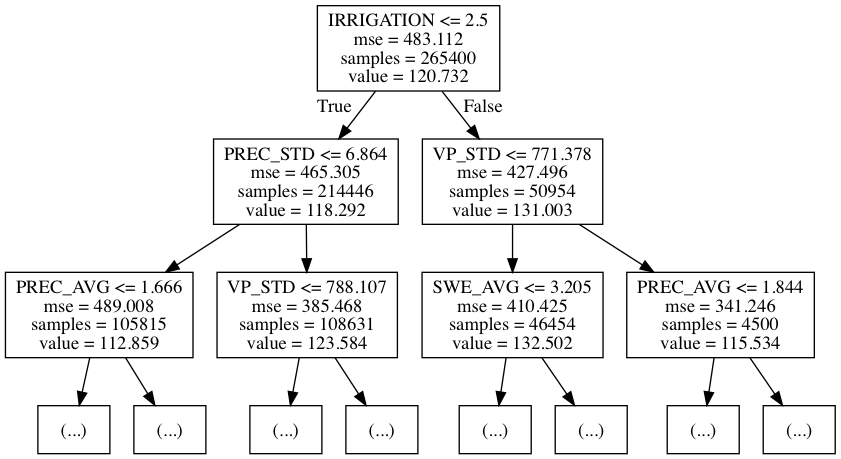

In [22]:
import pydotplus 
from IPython.display import Image

feature_names = [key for key in drought_stress_df.columns if not key == 'YIELD']

dot_data = tree.export_graphviz(tree_model_ds,
                                max_depth=2,
                                out_file=None,
                                feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())